🔹 First 5 Rows of Dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

🔹 Accuracy: 0.9333333333333333

🔹 Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

🔹 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



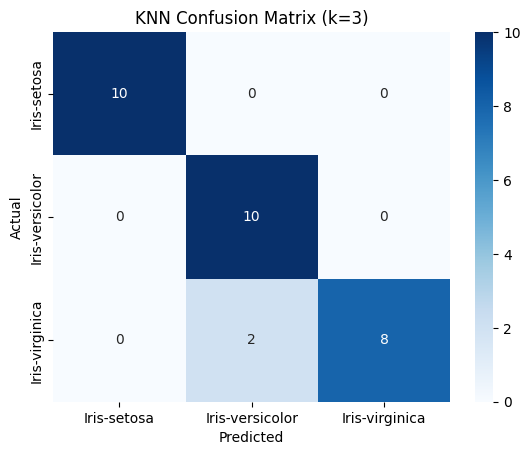

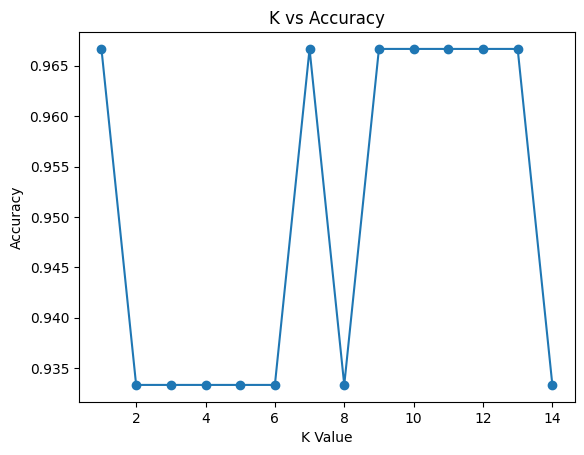

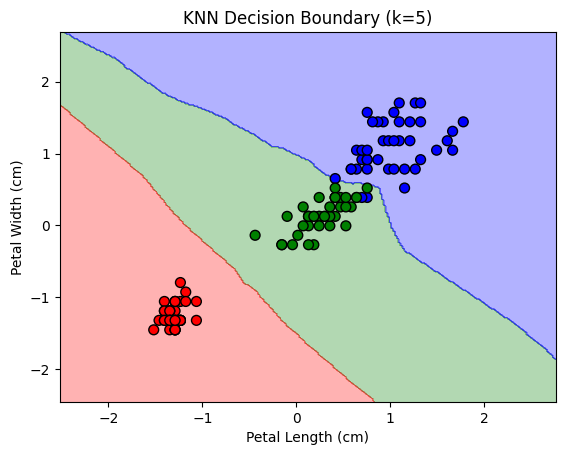

In [7]:
# ======================================================
# 🔹 K-Nearest Neighbors (KNN) Classification - All in One
# Dataset: Iris (Loaded from Iris.csv)
# Tools: Scikit-learn, Pandas, Matplotlib
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# 1. Load Dataset from CSV
df = pd.read_csv("Iris.csv")

# Drop Id column
df = df.drop("Id", axis=1)

# Features and Target
X = df.drop("Species", axis=1)
y = df["Species"]

print("🔹 First 5 Rows of Dataset:")
print(df.head())

# 2. Train-Test Split + Normalize
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Train Model (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 4. Evaluation
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=df["Species"].unique())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=df["Species"].unique(),
            yticklabels=df["Species"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (k=3)")
plt.show()

# 5. Experiment with different K values
accuracy_scores = []
k_values = range(1, 15)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

# 6. Visualize Decision Boundary (2 Features: PetalLengthCm & PetalWidthCm)
X_2d = df[["PetalLengthCm", "PetalWidthCm"]].values
y_2d = df["Species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}).values

X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k', s=50)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("KNN Decision Boundary (k=5)")
plt.show()
